In HP-Omen: tf-gpu

In [1]:
# !pip install tensorflow==1.15.2

(1920, 156)
Iter:0 train_rmse:5.621 test_loss:299.2 test_rmse:6.281 test_acc:0.5611
Iter:1 train_rmse:5.402 test_loss:272.5 test_rmse:5.994 test_acc:0.5811
Iter:2 train_rmse:5.343 test_loss:267.3 test_rmse:5.936 test_acc:0.5852
Iter:3 train_rmse:5.296 test_loss:262.9 test_rmse:5.887 test_acc:0.5886
Iter:4 train_rmse:5.257 test_loss:259.2 test_rmse:5.846 test_acc:0.5915
Iter:5 train_rmse:5.225 test_loss:256.2 test_rmse:5.811 test_acc:0.5939
Iter:6 train_rmse:5.199 test_loss:253.6 test_rmse:5.781 test_acc:0.596
Iter:7 train_rmse:5.178 test_loss:251.4 test_rmse:5.756 test_acc:0.5977
Iter:8 train_rmse:5.16 test_loss:249.5 test_rmse:5.735 test_acc:0.5992
Iter:9 train_rmse:5.143 test_loss:247.9 test_rmse:5.716 test_acc:0.6006
Iter:10 train_rmse:5.129 test_loss:246.4 test_rmse:5.699 test_acc:0.6018
Iter:11 train_rmse:5.116 test_loss:245.0 test_rmse:5.683 test_acc:0.6029
Iter:12 train_rmse:5.103 test_loss:243.8 test_rmse:5.668 test_acc:0.6039
Iter:13 train_rmse:5.091 test_loss:242.6 test_rmse:

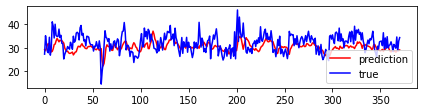

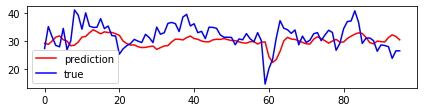

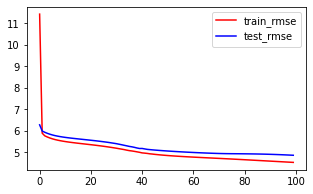

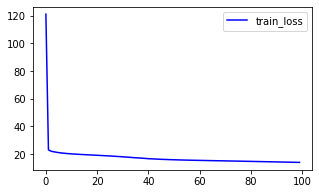

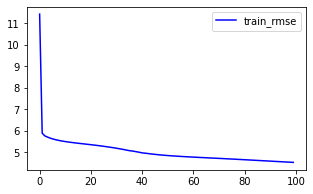

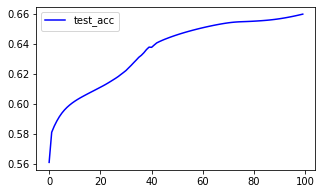

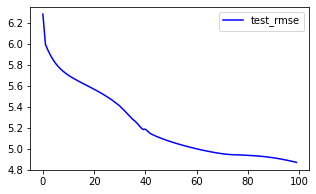

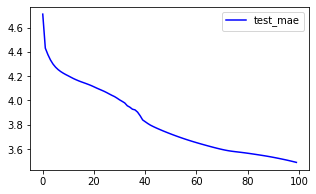

min_rmse:4.869337 min_mae:3.4904878 max_acc:0.6597185134887695 r2:0.7846390753984451 var:0.7983255982398987
Wall time: 37min 50s


In [5]:
%%time
# %run main.py --learning_rate=0.001 --training_epoch=100 --gru_units=64 --seq_len=12 --pre_len=1 --train_rate=0.8 --batch_size=32 --dataset=sz --model_name=tgcn
%run main.py --dataset=sz --training_epoch=100

In [2]:
(0.07781-0.07007)/0.07781
(0.073-0.07)/0.073

0.041095890410958756

ماتریس 
results N x d

N: Number of test instances (time instances): 384 = 1920*.2

d: Number of locations (156)

(1920, 156)
Iter:0 train_rmse:7.081 test_loss:408.8 test_rmse:7.342 test_acc:0.4869
Iter:1 train_rmse:6.142 test_loss:328.3 test_rmse:6.579 test_acc:0.5402
Iter:2 train_rmse:5.848 test_loss:300.4 test_rmse:6.294 test_acc:0.5602
Iter:3 train_rmse:5.654 test_loss:283.2 test_rmse:6.11 test_acc:0.573
Iter:4 train_rmse:5.515 test_loss:271.2 test_rmse:5.979 test_acc:0.5821
Iter:5 train_rmse:5.409 test_loss:262.1 test_rmse:5.878 test_acc:0.5893
Iter:6 train_rmse:5.321 test_loss:254.6 test_rmse:5.793 test_acc:0.5952
Iter:7 train_rmse:5.246 test_loss:248.2 test_rmse:5.72 test_acc:0.6003
Iter:8 train_rmse:5.182 test_loss:242.7 test_rmse:5.656 test_acc:0.6047
Iter:9 train_rmse:5.125 test_loss:238.0 test_rmse:5.601 test_acc:0.6086
Iter:10 train_rmse:5.076 test_loss:233.8 test_rmse:5.551 test_acc:0.6121
Iter:11 train_rmse:5.033 test_loss:230.1 test_rmse:5.507 test_acc:0.6152
Iter:12 train_rmse:4.994 test_loss:226.8 test_rmse:5.467 test_acc:0.6179
Iter:13 train_rmse:4.96 test_loss:223.8 test_rmse:5.

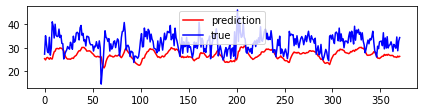

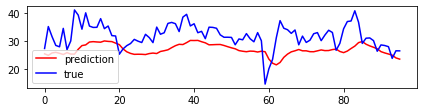

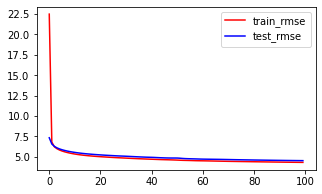

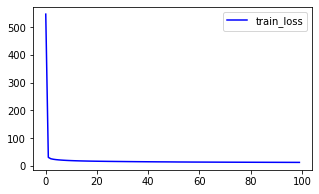

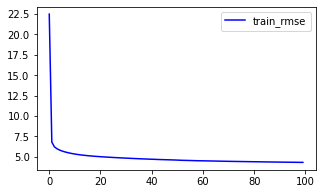

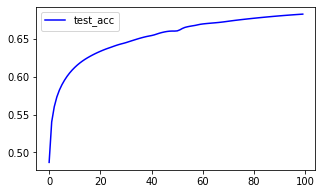

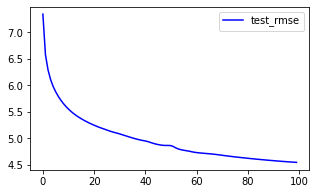

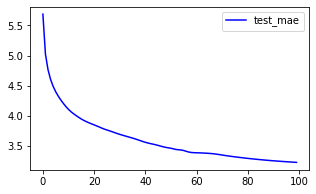

min_rmse:4.5465474 min_mae:3.2271898 max_acc:0.6822759211063385 r2:0.8122453540563583 var:0.8133350014686584
Wall time: 36min 54s


In [2]:
%%time
%run main.py --dataset=sz --adjacency_matrix=gsl --training_epoch=100

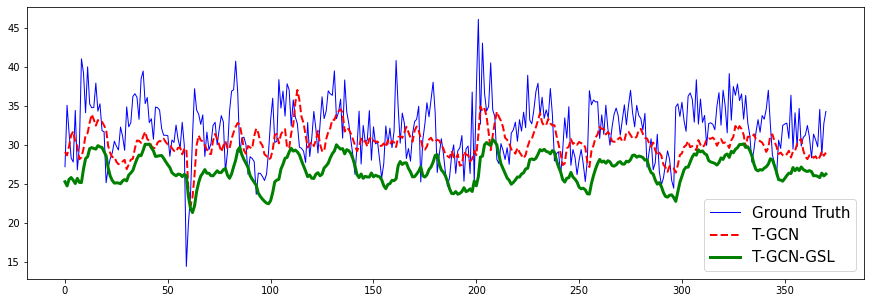

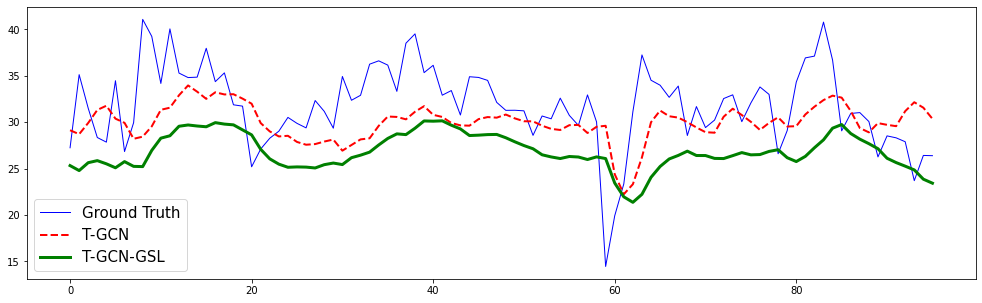

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
##compare all test result 
path = 'out/tgcn/tgcn_sz_lr0.001_batch32_unit64_seq12_pre1_epoch100_adj-dist/test_result.xlsx'
data = pd.read_excel(path, sheet_name='pred', header=None)
test_result = data.values
data = pd.read_excel(path, sheet_name='true', header=None)
true_labels = data.values

path = 'out/tgcn/tgcn_sz_lr0.001_batch32_unit64_seq12_pre1_epoch100_adj-gsl/test_result.xlsx'
data = pd.read_excel(path, sheet_name='pred', header=None)
test_result_gsl = data.values
# data = pd.read_excel(path, sheet_name='true', header=None)
# true_labels = data.values

path = 'out/tgcn'
fig1 = plt.figure(figsize=(15,5))
#    ax1 = fig1.add_subplot(1,1,1)
a_pred = test_result[:,0]
a_pred_gsl = test_result_gsl[:,0]
a_true = true_labels[:,0]
plt.plot(a_true,'b-',label='Ground Truth', linewidth=1.0)
plt.plot(a_pred,'r--',label='T-GCN', linewidth=2.0)
plt.plot(a_pred_gsl,'g-',label='T-GCN-GSL', linewidth=3.0)
plt.legend(loc='best',fontsize=15)
plt.savefig(path+'/compare_all.jpg')
plt.show()
## oneday test result visualization
fig1 = plt.figure(figsize=(17,5))
#    ax1 = fig1.add_subplot(1,1,1)
a_pred = test_result[:96,0]
a_pred_gsl = test_result_gsl[:96,0]
a_true = true_labels[0:96,0]
plt.plot(a_true,'b-',label='Ground Truth', linewidth=1.0)
plt.plot(a_pred,'r--',label='T-GCN', linewidth=2.0)
plt.plot(a_pred_gsl,'g-',label='T-GCN-GSL', linewidth=3.0)
plt.legend(loc='best',fontsize=15)
plt.savefig(path+'/test_oneday.jpg')
plt.show()
